In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
from pandas import DataFrame
from seaborn import pairplot

## Analyze The Basic Form of The Dataset

In [2]:
iris = load_iris()

#### Examine the head of the data.

In [3]:
print(iris.data[:5])

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


#### Examine the shape of the data. The first number is the number of rows (observations) and the second number is the number of columns (features).

In [4]:
print(iris.data.shape)

(150, 4)


#### Examine the feature names.

In [5]:
print(iris.feature_names)

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


#### Examine the target (species) names and codes.

In [6]:
print(iris.target)
print(iris.target_names)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
['setosa' 'versicolor' 'virginica']


#### Terminology
1. Each row is called an __observation__ (also called a sample, instance, or record).
2. Each column is called a __feature__ (also called an attribute, variable, or input).
3. The values to be predicted are called __targets__.

#### Findings
In this dataset we have 150 __observations__ of four __features__ and three __targets__. More specifically, there are measurements of sepal and petal length and width for 150 different iris flowers of three species.

The goal of this analysis will be to explore the accuracy of several classification models to predict the target of an observation given its features.

## Analyze The Distribution of Features

#### Examine the distribution of the features for all targets.

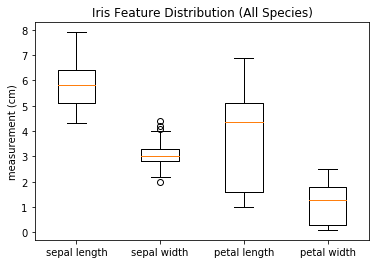

In [7]:
fig, axs = plt.subplots()

# reshape feature columns into 1-d arrays and compile to a list
f_0 = iris.data[:, [0]].reshape( (150,) )
f_1 = iris.data[:, [1]].reshape( (150,) )
f_2 = iris.data[:, [2]].reshape( (150,) )
f_3 = iris.data[:, [3]].reshape( (150,) )
data = [f_0, f_1, f_2, f_3]

# plot and modify
plt.boxplot(data)
axs.set_title("Iris Feature Distribution (All Species)")
axs.set_ylabel("measurement (cm)")
axs.set_xticklabels(["sepal length", "sepal width", "petal length", "petal width"])

plt.show()

This graph gives us some general information about petal and sepal dimensions for all three species, but it does not tell us how the species' measurements are different.

#### Examine Feature Measurements by Target

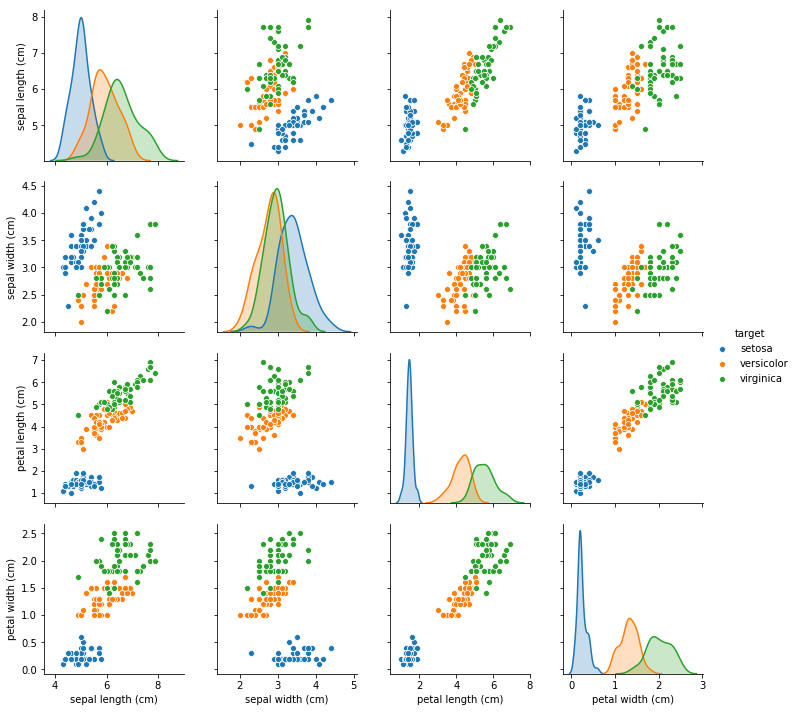

In [8]:
# need to convert numpy ndarray to pandas dataframe for pairplot function
iris_df = DataFrame(iris.data, columns=iris.feature_names)
# add column of target for each observation for coloring in pairplot
# target codes are converted to species names through iteration and cross-reference
iris_df["target"] = [iris.target_names[target] for target in iris.target]

pairplot(iris_df, vars=iris.feature_names, hue="target")

We can see the Iris Setosa plants have a clear separation in measurements from the Iris Versicolor and Iris Virginica plants. The Iris Setosa plants have distinctly smaller measurements for all features. Although the separation between the Iris Versicolor and Iris Virginica plants is more ambiguous, differences in the two can be seen. The Iris Virginica plants have distinctly larger petals than the Iris Versicolor, but have similarly sized sepals. This leads to the two plants tending apart in measurements to varying degrees.

## Apply Statistical Models

The data is randomly split into training and testing datasets with 80 and 20 percent of the data, respectively. Statistical classfication models are applied to to the training data and tested with the testing data. The accuracy of the model is evaluated with how many targets of the testing data it correctly predicts.

In [9]:
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2)

#### Logistic Regression

In [10]:
classifier = LogisticRegression()

# train the model
classifier.fit(x_train, y_train)

# test the model
y_pred = classifier.predict(x_test)
lr_score = accuracy_score(y_test, y_pred)

# summarize the accuracy of the model
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", lr_score)

=== Classification Report ===
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.91      1.00      0.95        10
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667


#### Naive Bayes

In [11]:
classifier = GaussianNB()

# train the model
classifier.fit(x_train, y_train)

# test the model
y_pred = classifier.predict(x_test)
nb_score = accuracy_score(y_test, y_pred)

# summarize the accuracy of the model
print("=== Classificaiton Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", nb_score)

=== Classificaiton Report ===
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10

avg / total       1.00      1.00      1.00        30

Accuracy Score: 1.0


#### Support Vector Machines

In [12]:
classifier = SVC()

# train the model
classifier.fit(x_train, y_train)

# test the model
y_pred = classifier.predict(x_test)
svm_score = accuracy_score(y_test, y_pred)

# summarize the accuracy of the model
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", svm_score)

=== Classification Report ===
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.91      1.00      0.95        10
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667


#### K-Nearest Neighbor

In [13]:
classifier = KNeighborsClassifier(n_neighbors=8)

# train the model
classifier.fit(x_train, y_train)

# test the model
y_pred = classifier.predict(x_test)
knn_score = accuracy_score(y_test, y_pred)

# summarize the accuracy of the model
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", knn_score)

=== Classification Report ===
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.91      1.00      0.95        10
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667


#### Decision Trees

In [14]:
classifier = DecisionTreeClassifier()

# train the model
classifier.fit(x_train, y_train)

# test the model
y_pred = classifier.predict(x_test)
dt_score = accuracy_score(y_test, y_pred)

# summarize the accuracy of the model
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))
print("Accuracy Score:", dt_score)

=== Classification Report ===
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        10
          1       0.91      1.00      0.95        10
          2       1.00      0.90      0.95        10

avg / total       0.97      0.97      0.97        30

Accuracy Score: 0.9666666666666667


## Summary

In [16]:
scores = [lr_score, nb_score, svm_score, knn_score, dt_score]
models = ["Linear Regression", "Naive Bayes", "Support Vector Machines", "K-Nearest Neighbor", "Decision Trees"]

# converted to dataframe for tabular output
DataFrame(data={"Model": models, "Accuracy": scores})

,Model,Accuracy
0,Linear Regression,0.966667
1,Naive Bayes,1.000000
2,Support Vector Machines,0.966667
3,K-Nearest Neighbor,0.966667
4,Decision Trees,0.966667


I've consistently seen the Support Vector Machines Model outperform the other four models. However, each run will be different given that the training and testing data is selected randomly.